In [13]:
import pymysql
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_score
import pandas as pd  # Importing pandas for table display

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
print("NLTK resources downloaded.")



NLTK resources downloaded.


[nltk_data] Downloading package punkt to C:\Users\Khalied
[nltk_data]     Maturino\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Khalied
[nltk_data]     Maturino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Pra-pemrosesan teks
nltk.download('punkt_tab')

text = "Ini adalah contoh teks untuk diproses."
print(f"Original text: {text}")

text = text.lower()
print(f"Lowercased text: {text}")

tokens = word_tokenize(text)
print(f"Tokenized text: {tokens}")

stop_words = set(stopwords.words('indonesian'))
tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
print(f"Filtered tokens (stopwords removed): {tokens}")

processed_text = " ".join(tokens)
print(f"Processed text: {processed_text}")


Original text: Ini adalah contoh teks untuk diproses.
Lowercased text: ini adalah contoh teks untuk diproses.
Tokenized text: ['ini', 'adalah', 'contoh', 'teks', 'untuk', 'diproses', '.']
Filtered tokens (stopwords removed): ['contoh', 'teks', 'diproses']
Processed text: contoh teks diproses


[nltk_data] Downloading package punkt_tab to C:\Users\Khalied
[nltk_data]     Maturino\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
from IPython.display import display

# Menghubungkan ke database MySQL dan mengambil data ulasan
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    database='ulasan'
)

try:
    with connection.cursor() as cursor:
        print("Connected to the database.")
        
        # Query untuk mengambil ulasan dan label
        cursor.execute("SELECT ulasan, label FROM ulasan")
        data = cursor.fetchall()
        
        print(f"Fetched {len(data)} rows from the database.")

        # Membuat DataFrame dari data yang diambil
        df_data = pd.DataFrame(data, columns=['Ulasan', 'Label'])
        
        print("\nData fetched from the database:")
        display(df_data)

        # Memisahkan ulasan dan label (jika diperlukan untuk pemrosesan lebih lanjut)
        ulasan = df_data['Ulasan'].tolist()
        labels = df_data['Label'].tolist()

finally:
    connection.close()
    print("Database connection closed.")

Connected to the database.
Fetched 2384 rows from the database.

Data fetched from the database:


,Ulasan,Label
0,"Kebun buah yang ada sangat menyenangkan, buahn...",Positif
1,Buah yang tersedia sangat bervariasi dan segar...,Negatif
2,Pengalaman memetik buah sendiri sungguh seru! ...,Positif
3,"Sayang sekali, banyak pohon buah yang tidak be...",Negatif
4,Wisata kebun buah ini sangat edukatif untuk an...,Positif
...,...,...
2379,"Pemandangan di sini cukup baik, tetapi saya te...",Netral
2380,Saya tidak merasa terinspirasi setelah mengunj...,Netral
2381,"Kebun ini bersih dan terawat, tetapi tidak ada...",Netral
2382,Saya merasa biasa saja selama kunjungan saya.,Netral


Database connection closed.


In [16]:
stop_words = set(stopwords.words('indonesian'))
results = []

for text in ulasan:
    original = text
    lowercased = text.lower()
    tokens = word_tokenize(lowercased)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    processed_text = " ".join(filtered_tokens)
    
    results.append({
        "Original": original,
        "Lowercased": lowercased,
        "Tokenized": str(tokens),
        "Filtered": str(filtered_tokens),
        "Processed": processed_text
    })

df = pd.DataFrame(results)

# Menampilkan tabel
display(df)

# Menyimpan hasil pemrosesan ke dalam list
ulasan_processed = df['Processed'].tolist()

,Original,Lowercased,Tokenized,Filtered,Processed
0,"Kebun buah yang ada sangat menyenangkan, buahn...","kebun buah yang ada sangat menyenangkan, buahn...","['kebun', 'buah', 'yang', 'ada', 'sangat', 'me...","['kebun', 'buah', 'menyenangkan', 'buahnya', '...",kebun buah menyenangkan buahnya segar dipetik ...
1,Buah yang tersedia sangat bervariasi dan segar...,buah yang tersedia sangat bervariasi dan segar...,"['buah', 'yang', 'tersedia', 'sangat', 'bervar...","['buah', 'tersedia', 'bervariasi', 'segar', 'a...",buah tersedia bervariasi segar area kebun terawat
2,Pengalaman memetik buah sendiri sungguh seru! ...,pengalaman memetik buah sendiri sungguh seru! ...,"['pengalaman', 'memetik', 'buah', 'sendiri', '...","['pengalaman', 'memetik', 'buah', 'sungguh', '...",pengalaman memetik buah sungguh seru keluarga ...
3,"Sayang sekali, banyak pohon buah yang tidak be...","sayang sekali, banyak pohon buah yang tidak be...","['sayang', 'sekali', ',', 'banyak', 'pohon', '...","['sayang', 'pohon', 'buah', 'berbuah', 'mengec...",sayang pohon buah berbuah mengecewakan
4,Wisata kebun buah ini sangat edukatif untuk an...,wisata kebun buah ini sangat edukatif untuk an...,"['wisata', 'kebun', 'buah', 'ini', 'sangat', '...","['wisata', 'kebun', 'buah', 'edukatif', 'belaj...",wisata kebun buah edukatif belajar jenis buah
...,...,...,...,...,...
2379,"Pemandangan di sini cukup baik, tetapi saya te...","pemandangan di sini cukup baik, tetapi saya te...","['pemandangan', 'di', 'sini', 'cukup', 'baik',...",['pemandangan'],pemandangan
2380,Saya tidak merasa terinspirasi setelah mengunj...,saya tidak merasa terinspirasi setelah mengunj...,"['saya', 'tidak', 'merasa', 'terinspirasi', 's...","['terinspirasi', 'mengunjungi']",terinspirasi mengunjungi
2381,"Kebun ini bersih dan terawat, tetapi tidak ada...","kebun ini bersih dan terawat, tetapi tidak ada...","['kebun', 'ini', 'bersih', 'dan', 'terawat', '...","['kebun', 'bersih', 'terawat', 'menonjol']",kebun bersih terawat menonjol
2382,Saya merasa biasa saja selama kunjungan saya.,saya merasa biasa saja selama kunjungan saya.,"['saya', 'merasa', 'biasa', 'saja', 'selama', ...",['kunjungan'],kunjungan


In [17]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ulasan_processed)
print(f"\nTF-IDF matrix shape: {X.shape}")



TF-IDF matrix shape: (2384, 441)


In [18]:
# Model Naive Bayes
model = MultinomialNB()
print("Initialized Naive Bayes model.")

# Cross-validation
scores = cross_val_score(model, X, labels, cv=5)
print(f"Akurasi cross-validation: {scores.mean() * 100:.2f}%")

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Fit model
model.fit(X_train, y_train)
print("Model trained.")


Initialized Naive Bayes model.
Akurasi cross-validation: 76.26%
Data split into training and testing sets.
Model trained.


In [19]:
# Prediksi pada data testing
y_pred = model.predict(X_test)
print(f"Predictions: {y_pred}")

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")
print("Predictions:", y_pred)



Predictions: ['Positif' 'Negatif' 'Negatif' 'Netral' 'Positif' 'Netral' 'Netral'
 'Negatif' 'Negatif' 'Positif' 'Positif' 'Negatif' 'Positif' 'Netral'
 'Negatif' 'Netral' 'Positif' 'Positif' 'Positif' 'Netral' 'Negatif'
 'Netral' 'Negatif' 'Negatif' 'Negatif' 'Negatif' 'Negatif' 'Netral'
 'Positif' 'Positif' 'Negatif' 'Positif' 'Positif' 'Positif' 'Netral'
 'Netral' 'Negatif' 'Negatif' 'Netral' 'Netral' 'Negatif' 'Negatif'
 'Positif' 'Netral' 'Positif' 'Negatif' 'Netral' 'Netral' 'Positif'
 'Netral' 'Netral' 'Negatif' 'Netral' 'Positif' 'Negatif' 'Positif'
 'Negatif' 'Negatif' 'Positif' 'Negatif' 'Netral' 'Negatif' 'Positif'
 'Positif' 'Netral' 'Positif' 'Netral' 'Netral' 'Positif' 'Positif'
 'Netral' 'Positif' 'Positif' 'Netral' 'Netral' 'Netral' 'Positif'
 'Positif' 'Negatif' 'Negatif' 'Positif' 'Positif' 'Netral' 'Negatif'
 'Netral' 'Positif' 'Positif' 'Positif' 'Netral' 'Netral' 'Netral'
 'Netral' 'Positif' 'Netral' 'Negatif' 'Netral' 'Negatif' 'Positif'
 'Positif' 'Negatif' 'Netra

Counts for visualization: [181, 158, 138]


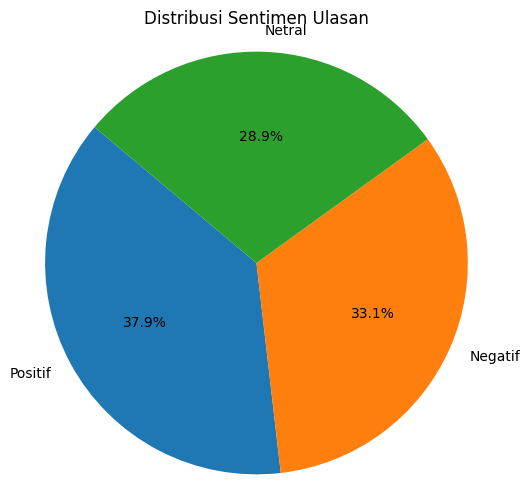

In [23]:
# Visualisasi distribusi prediksi
labels = ['Positif', 'Negatif', 'Netral']
counts = [y_pred.tolist().count('Positif'), y_pred.tolist().count('Negatif'), y_pred.tolist().count('Netral')]
print(f"Counts for visualization: {counts}")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Distribusi Sentimen Ulasan")
plt.show()


In [24]:
# Simpan model dan vectorizer
joblib.dump(model, 'model_sentimen.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model dan vectorizer berhasil disimpan!")


Model dan vectorizer berhasil disimpan!


In [21]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

# Pra-pemrosesan teks
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

# Memuat model yang sudah disimpan
def load_model():
    model = joblib.load('model_sentimen.pkl')
    vectorizer = joblib.load('vectorizer.pkl')
    return model, vectorizer

# Memproses ulasan baru
def predict_sentiment(ulasan_baru):
    # Pra-pemrosesan ulasan baru
    ulasan_baru_processed = [preprocess_text(ul) for ul in ulasan_baru]

    # Memuat model dan vectorizer
    model, vectorizer = load_model()

    # Mengubah ulasan baru menjadi representasi TF-IDF
    X_new = vectorizer.transform(ulasan_baru_processed)

    # Prediksi sentimen
    prediksi = model.predict(X_new)

    return prediksi

# Contoh data ulasan baru yang belum berlabel
ulasan_baru = [
    "Kebun buah di sini sangat menarik, buahnya segar dan bisa dipetik langsung. Cocok untuk keluarga. Anak-anak saya senang sekali!",
    "engalaman di peternakan cukup edukatif. Anak-anak bisa belajar langsung tentang cara beternak. Namun, fasilitasnya kurang terawat.",
    "Lokasi wisata perikanannya sangat kurang menarik. Kurang bersih dan tidak ada tempat teduh untuk beristirahat",
    "Kegiatan agro edukasi kurang interaktif, hanya diberikan informasi tanpa aktivitas langsung"
]

# Prediksi sentimen ulasan baru
hasil_prediksi = predict_sentiment(ulasan_baru)

# Tampilkan hasil prediksi
for ulasan, sentimen in zip(ulasan_baru, hasil_prediksi):
    print(f"Ulasan: {ulasan} => Prediksi Sentimen: {sentimen}")




Ulasan: Kebun buah di sini sangat menarik, buahnya segar dan bisa dipetik langsung. Cocok untuk keluarga. Anak-anak saya senang sekali! => Prediksi Sentimen: Positif
Ulasan: engalaman di peternakan cukup edukatif. Anak-anak bisa belajar langsung tentang cara beternak. Namun, fasilitasnya kurang terawat. => Prediksi Sentimen: Positif
Ulasan: Lokasi wisata perikanannya sangat kurang menarik. Kurang bersih dan tidak ada tempat teduh untuk beristirahat => Prediksi Sentimen: Negatif
Ulasan: Kegiatan agro edukasi kurang interaktif, hanya diberikan informasi tanpa aktivitas langsung => Prediksi Sentimen: Negatif


In [22]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import mysql.connector

# Download NLTK resources (jika belum di-download)
# nltk.download('punkt')
# nltk.download('stopwords')

# Pra-pemrosesan teks
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

# Memuat model yang sudah disimpan
def load_model():
    model = joblib.load('model_sentimen.pkl')
    vectorizer = joblib.load('vectorizer.pkl')
    return model, vectorizer

# Memproses ulasan dan memprediksi sentimen
def predict_sentiment(ulasan_baru):
    ulasan_baru_processed = [preprocess_text(ul) for ul in ulasan_baru]
    model, vectorizer = load_model()
    X_new = vectorizer.transform(ulasan_baru_processed)
    prediksi = model.predict(X_new)
    return prediksi

# Koneksi ke database
def connect_to_database():
    try:
        connection = mysql.connector.connect(
            host='localhost',  # Ganti dengan host database Anda
            user='root',   # Ganti dengan username database Anda
            password='', # Ganti dengan password database Anda
            database='ulasan' # Ganti dengan nama database Anda
        )
        return connection
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

# Mengambil semua ulasan dari database
def get_all_reviews():
    connection = connect_to_database()
    if connection is not None:
        cursor = connection.cursor()
        cursor.execute("SELECT ulasan FROM data_ulasan")
        reviews = cursor.fetchall()
        cursor.close()
        connection.close()
        return [review[0] for review in reviews]  # Ambil ulasan sebagai list
    else:
        print("Gagal terhubung ke database.")
        return []

# Menyimpan hasil prediksi ke database
def save_to_database(ulasan, sentimen):
    connection = connect_to_database()
    if connection is not None:
        cursor = connection.cursor()
        sql = "UPDATE data_ulasan SET label = %s WHERE ulasan = %s"
        cursor.execute(sql, (sentimen, ulasan))
        connection.commit()
        cursor.close()
        connection.close()
        print(f"Ulasan: '{ulasan}' disimpan dengan label: '{sentimen}'")
    else:
        print("Gagal terhubung ke database.")

# Mengambil ulasan dari database
ulasan_baru = get_all_reviews()

# Prediksi sentimen ulasan baru
hasil_prediksi = predict_sentiment(ulasan_baru)

# Tampilkan hasil prediksi dan simpan ke database
for ulasan, sentimen in zip(ulasan_baru, hasil_prediksi):
    print(f"Ulasan: {ulasan} => Prediksi Sentimen: {sentimen}")
    save_to_database(ulasan, sentimen)


Ulasan: Kebun buah ini memiliki berbagai pilihan buah segar yang sangat lezat! => Prediksi Sentimen: Positif
Ulasan: 'Kebun buah ini memiliki berbagai pilihan buah segar yang sangat lezat!' disimpan dengan label: 'Positif'
Ulasan: Wisata peternakan ini sangat mendidik, anak-anak saya belajar banyak tentang hewan. => Prediksi Sentimen: Positif
Ulasan: 'Wisata peternakan ini sangat mendidik, anak-anak saya belajar banyak tentang hewan.' disimpan dengan label: 'Positif'
Ulasan: Pemandangan sawahnya sangat indah dan menenangkan, saya sangat suka. => Prediksi Sentimen: Positif
Ulasan: 'Pemandangan sawahnya sangat indah dan menenangkan, saya sangat suka.' disimpan dengan label: 'Positif'
Ulasan: Agro edukasi di sini menarik dan memberikan wawasan tentang keberlanjutan. => Prediksi Sentimen: Positif
Ulasan: 'Agro edukasi di sini menarik dan memberikan wawasan tentang keberlanjutan.' disimpan dengan label: 'Positif'
Ulasan: Kami menikmati waktu bersama keluarga di kebun buah ini, sangat menyen